In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

dataset = pd.read_csv("data/C_17_dataset_96_0_upFile.csv", encoding = "ISO-8859-1", sep=';')

In [79]:
df = dataset[["Anno", "Descrizione Regione", "Descrizione disciplina", "Tipo di Disciplina", "Totale posti letto"]].copy()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [80]:
desc = df[df["Descrizione disciplina"].isin(["PNEUMOLOGIA", "MALATTIE INFETTIVE E TROPICALI", "TERAPIA INTENSIVA"])]
print(desc["Descrizione disciplina"].unique())

desc = desc[desc["Anno"] == 2018]
desc.head()

desc = desc.groupby(["Descrizione Regione", "Descrizione disciplina", "Tipo di Disciplina"], as_index=False).agg({"Totale posti letto": 'sum'})
desc.head()

['TERAPIA INTENSIVA' 'PNEUMOLOGIA' 'MALATTIE INFETTIVE E TROPICALI']


,Descrizione Regione,Descrizione disciplina,Tipo di Disciplina,Totale posti letto
0,ABRUZZO,MALATTIE INFETTIVE E TROPICALI,ACUTI,87
1,ABRUZZO,PNEUMOLOGIA,ACUTI,72
2,ABRUZZO,TERAPIA INTENSIVA,ACUTI,109
3,BASILICATA,MALATTIE INFETTIVE E TROPICALI,ACUTI,46
4,BASILICATA,PNEUMOLOGIA,ACUTI,76


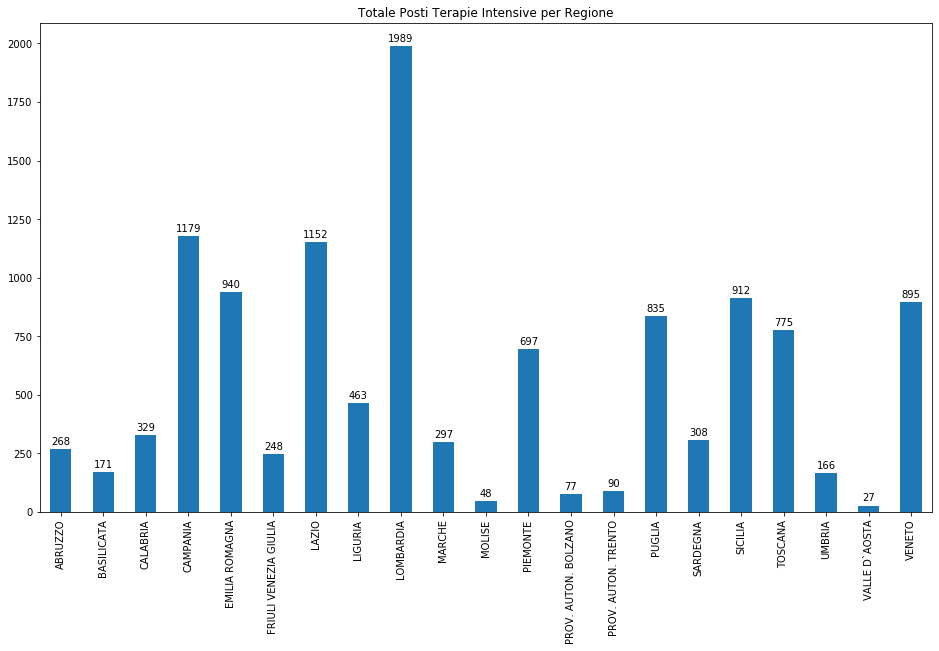

In [81]:
#get x label

desc = desc.groupby(["Descrizione Regione"], as_index=False).agg({"Totale posti letto": 'sum'})


label = desc['Descrizione Regione'].tolist()


#Create plot
ax = desc.plot.bar(title="Totale Posti Terapie Intensive per Regione", figsize=(16,9), rot=1)
ax.get_legend().remove()

#add x labels
plt.xticks(np.arange(len(label)), label, rotation=90)

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max(desc["Totale posti letto"].tolist())) * 0.01

#write column values over them
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')    

#Show plot
plt.show()

In [83]:
desc.to_csv("data/Totale_posti_terapie_intensive_per_regione.csv")